In [1]:
filename = "last16.txt"

def dist(p1,p2):
    from math import sqrt
    d = (float(p1[0])-float(p2[0]))**2 + (float(p1[1]) - float(p2[1]))**2
    return sqrt(d)

def create_m(filename):
    coo_x_y = []
    with open("../data/"+filename) as f:
        n=int(f.next().strip())
        for line in f:
            coo_x_y.append(line.strip().split())
    matrix = []
    for i in range(n):
        tmp = []
        for j in range(n):
            tmp.append(dist(coo_x_y[i], coo_x_y[j]))
        matrix.append(tmp)
    return matrix,coo_x_y

In [2]:
matrix,coo_x_y = create_m(filename)

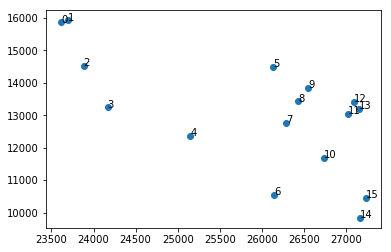

In [3]:
x = [float(coo[0]) for coo in coo_x_y]
y= [float(coo[1]) for coo in coo_x_y]
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)

for i in range(len(x)):
    plt.annotate(i, (x[i],y[i]))


In [4]:
import numpy as np
dist = np.array(matrix)

part = dist[:,:]

In [5]:
# create the list of subsets, ordered by the number of elements in it
def create_subsets(mylist):
    tmp = reduce(lambda x, y: x + [i + [y] for i in x], mylist, [[]])
    tmp.pop(0)
    tmp.sort(key = len)
    return [set(i) for i in tmp]

In [6]:
# indexing each subset using a unique number, n is the number of elements in the whole set
def code_set(myset,n):
    code = [0]*n
    for i in myset:
        code[i-1] ='1'
    b_code = "".join(str(i) for i in code)
    return int(b_code,2)

In [7]:
# create the subsets and code for each subset
n = len(part)
mylist = range(1,n)
subsets = create_subsets(mylist)
codes = [code_set(i,n-1) for i in subsets]


In [9]:
res = [[[float("inf")] for j in range(len(subsets))] for i in range(n)]
tour = [[[None,None] for j in  range(len(subsets))] for i in range(n)]
for i in range(n-1):
    element = list(subsets[i])[0]
    res[element][i] = part[0][element]
for s in subsets[n-1:]:
    code = code_set(s,n-1)
    index_s = codes.index(code)
    for j in s:
        s_j = s - {j}

        code = code_set(s_j,n-1)
        index_j = codes.index(code)

        
        for k in s_j:

            if res[j][index_s] > res[k][index_j]+part[k,j]:
               res[j][index_s] = res[k][index_j]+part[k,j]
               tour[j][index_s] = [k,index_j]


In [10]:
final = float("inf")
return_point = None
for i in range(1,n):
    if final > res[i][len(subsets)-1]+part[i,0]:
        
       final = res[i][len(subsets)-1]+part[i,0]
       return_point = i

# There must be two eqaul elements
#[res[i][len(subsets)-1] + part[i,0] for i in range(1,len(res))]
print final

16449.51509


In [256]:
point = return_point
index = -1

points=[0,point]
for i in range(n-2):
    points.append(tour[point][index][0])
    index = tour[point][index][1]
    point = points[-1]
points.append(0)
    
    

In [257]:
print "points order:",points

points order: [0, 1, 5, 9, 8, 12, 13, 11, 7, 10, 15, 14, 6, 4, 3, 2, 0]
